**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*
*, completed by Junru Lu*

In [1]:
from __future__ import print_function, division
import pylab as pl

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

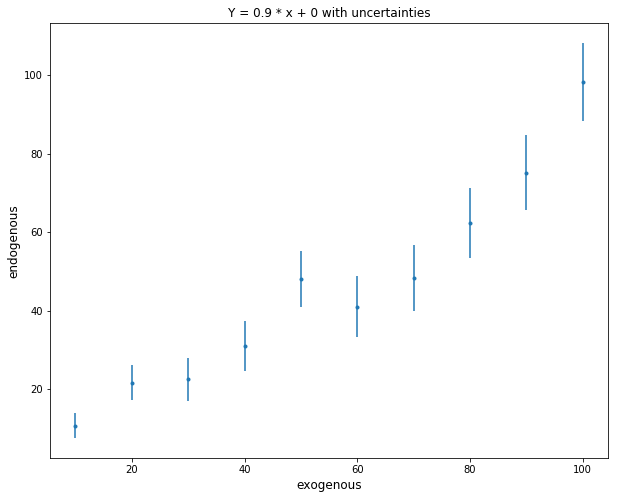

In [3]:
slope = 0.9
intercept = 0
x = np.linspace(10, 100, 10)
y = line(slope, x, b=intercept, errors=errors)
plt.figure(figsize=(10, 8))
plt.errorbar(x, y, yerr=[errors(xx) for xx in x], linestyle="None", fmt='.')
plt.title("Y = %s * x + %s with uncertainties"%(slope, intercept))
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print(y)

[ 10.69559956  21.5715972   22.5307905   31.00379026  48.11688474
  41.03152219  48.27954521  62.2796671   75.17246824  98.27032817]


In [5]:
print(x)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [6]:
sm.add_constant(x)

array([[   1.,   10.],
       [   1.,   20.],
       [   1.,   30.],
       [   1.,   40.],
       [   1.,   50.],
       [   1.,   60.],
       [   1.,   70.],
       [   1.,   80.],
       [   1.,   90.],
       [   1.,  100.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     481.6
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           4.00e-09
Time:                        16:08:20   Log-Likelihood:                -33.806
No. Observations:                  10   AIC:                             69.61
Df Residuals:                       9   BIC:                             69.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8384      0.038     21.945      0.000         0.752     0.925
==============================================================================
Omnibus:                        0.807   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.408
Skew:                           0.453   Prob(JB):                        0.815
Kurtosis:                       2.602   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     95.29
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           1.02e-05
Time:                        16:08:24   Log-Likelihood:                -33.785
No. Observations:                  10   AIC:                             71.57
Df Residuals:                       8   BIC:                             72.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.0003      5.420     -0.185      0.858       -13.498    11.498
x1             0.8526      0.087      9.762      0.000         0.651     1.054
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.342
Skew:                           0.335   Prob(JB):                        0.843
Kurtosis:                       2.389   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Difference: The R-suqared dropped from the wrong way to the right way. The right way fit an intercept to help fit the line, which means part of Y was explained by the intercept other than X.

# 4. plot the data (as points) and both statsmodels fits

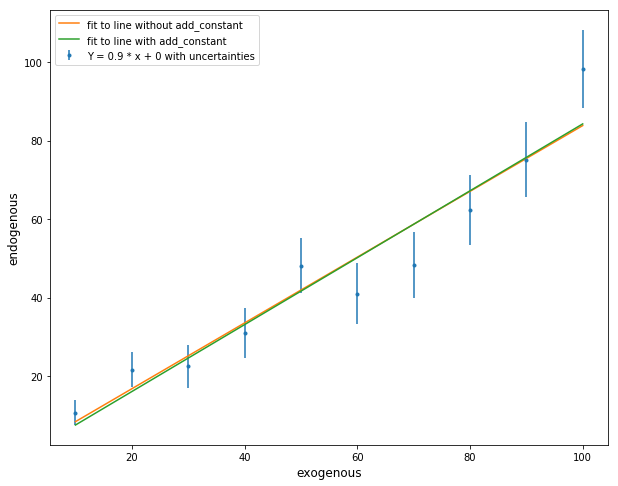

In [9]:
plt.figure(figsize=(10, 8))
plt.errorbar(x, y, yerr=[errors(xx) for xx in x], linestyle="None", fmt='.', 
             label="Y = %s * x + %s with uncertainties"%(slope, intercept))
plt.plot(x, smfit_wrong.predict(x), label="fit to line without add_constant")
plt.plot(x, smfit_right.predict(sm.add_constant(x)), label="fit to line with add_constant")
plt.legend(loc="upper left")
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

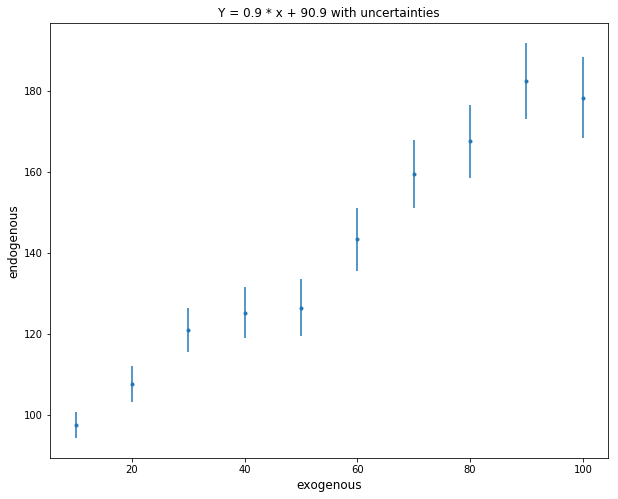

In [10]:
intercept = 101 * slope
x = np.linspace(10, 100, 10)
y = line(slope, x, b=intercept, errors=errors)
plt.figure(figsize=(10, 8))
plt.errorbar(x, y, yerr=[errors(xx) for xx in x], linestyle="None", fmt='.')
plt.title("Y = %s * x + %s with uncertainties"%(slope, intercept))
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 6. repeat step 3

In [11]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           3.16e-06
Time:                        16:08:40   Log-Likelihood:                -51.260
No. Observations:                  10   AIC:                             104.5
Df Residuals:                       9   BIC:                             104.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.2213      0.219     10.151      0.000         1.726     2.716
==============================================================================
Omnibus:                        0.390   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.457
Skew:                          -0.000   Prob(JB):                        0.796
Kurtosis:                       1.953   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     265.1
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           2.04e-07
Time:                        16:08:43   Log-Likelihood:                -29.991
No. Observations:                  10   AIC:                             63.98
Df Residuals:                       8   BIC:                             64.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         87.3636      3.709     23.557      0.000        78.812    95.916
x1             0.9732      0.060     16.283      0.000         0.835     1.111
==============================================================================
Omnibus:                        0.792   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.496
Skew:                          -0.482   Prob(JB):                        0.780
Kurtosis:                       2.489   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Difference: The R-suqared raised from the wrong way to the right way. The right way fit an appropriate intercept to help fit the line.

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [13]:
smfit_right = smf.WLS(y, sm.add_constant(x), weights=[1/sqrt(xx) for xx in x]).fit()
smfit_right.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            WLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     333.6
Date:                Sat, 10 Nov 2018   Prob (F-statistic):           8.30e-08
Time:                        16:08:49   Log-Likelihood:                -29.195
No. Observations:                  10   AIC:                             62.39
Df Residuals:                       8   BIC:                             63.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         87.7260      2.822     31.082      0.000        81.217    94.235
x1             0.9671      0.053     18.266      0.000         0.845     1.089
==============================================================================
Omnibus:                        1.265   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                0.596
Skew:                          -0.574   Prob(JB):                        0.742
Kurtosis:                       2.668   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The WLS fit a little bit better than OLS

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

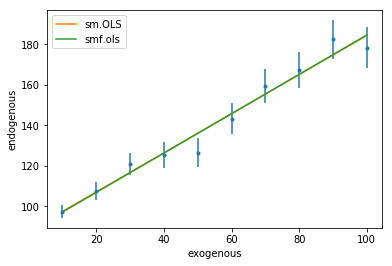

In [14]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit_right.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();